In [1]:
# import our modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# couldn't read_csv without error message.. so I opened the csv file in VS code and 
# saved with encoding 'utf-8'

df = pd.read_csv('DSI_kickstarterscrape_dataset.csv', encoding='utf-8')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45957 entries, 0 to 45956
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   project id         45957 non-null  int64  
 1   name               45957 non-null  object 
 2   url                45957 non-null  object 
 3   category           45957 non-null  object 
 4   subcategory        45957 non-null  object 
 5   location           44635 non-null  object 
 6   status             45957 non-null  object 
 7   goal               45957 non-null  float64
 8   pledged            45945 non-null  float64
 9   funded percentage  45957 non-null  float64
 10  backers            45957 non-null  int64  
 11  funded date        45957 non-null  object 
 12  levels             45957 non-null  int64  
 13  reward levels      45898 non-null  object 
 14  updates            45957 non-null  int64  
 15  comments           45957 non-null  int64  
 16  duration           459

In [3]:
# first 5 rows

df.head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


In [4]:
# strip spaces for column names, ran into a problem with the spacing between column names later
# when trying to extract the date variables
df.columns = df.columns.str.replace(' ', '_')

In [5]:
# just checking number of rows

len(df)

45957

In [6]:
# making sure the data types make sense

print(df.dtypes)

project_id             int64
name                  object
url                   object
category              object
subcategory           object
location              object
status                object
goal                 float64
pledged              float64
funded_percentage    float64
backers                int64
funded_date           object
levels                 int64
reward_levels         object
updates                int64
comments               int64
duration             float64
dtype: object


In [7]:
# mean for 'pledged' can also be seen here

df.describe()

,project_id,goal,pledged,funded_percentage,backers,levels,updates,comments,duration
count,4.595700e+04,4.595700e+04,4.594500e+04,45957.000000,45957.000000,45957.000000,45957.00000,45957.000000,45957.000000
mean,1.080800e+09,1.194271e+04,4.980750e+03,1.850129,69.973192,8.004939,4.08508,8.379529,39.995547
std,6.218057e+08,1.887583e+05,5.674162e+04,88.492706,688.628479,4.233907,6.43922,174.015737,17.414458
min,3.940900e+04,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,5.438962e+08,1.800000e+03,1.960000e+02,0.044000,5.000000,5.000000,0.00000,0.000000,30.000000
50%,1.078345e+09,4.000000e+03,1.310000e+03,1.000000,23.000000,7.000000,2.00000,0.000000,32.000000
75%,1.621596e+09,9.862000e+03,4.165000e+03,1.115640,59.000000,10.000000,6.00000,3.000000,48.390000
max,2.147460e+09,2.147484e+07,1.026684e+07,15066.000000,87142.000000,80.000000,149.00000,19311.000000,91.960000


In [8]:
# choose column name 'pledged' and use method .mean to find the mean for pledged

df['pledged'].mean()

# pledged mean is 4980 dollars

4980.749678963979

In [9]:
# how many projects have zero backers?

with_zero_backers = df['backers'][df['backers'] == 0]
print(len(with_zero_backers))

without_zero_backers = df['backers'][df['backers'] > 0]
print(len(without_zero_backers))

3945
42012


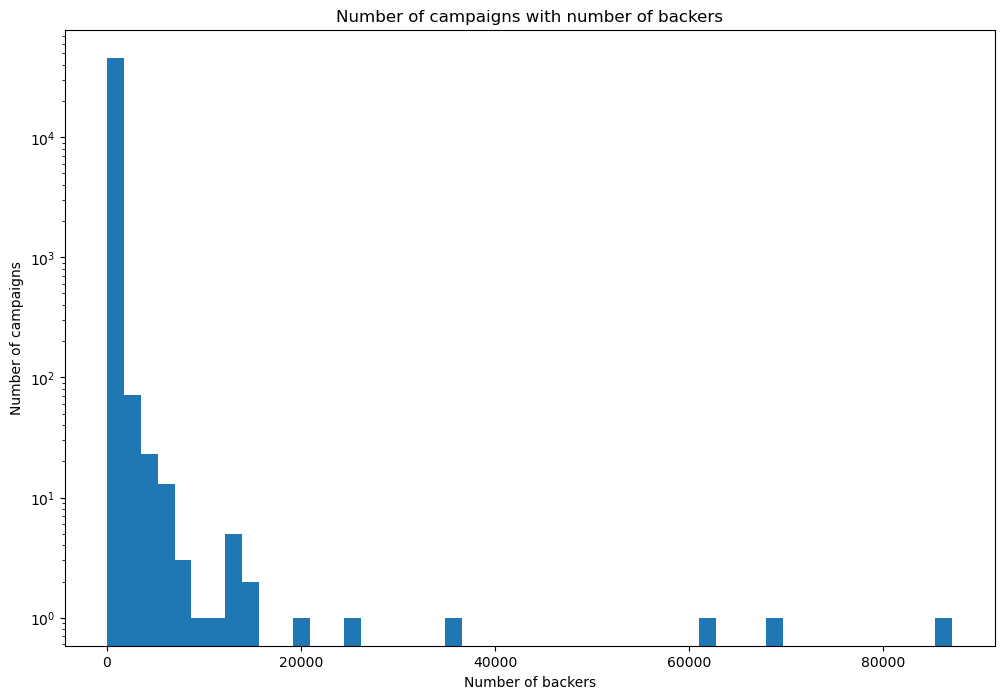

In [10]:
# plot a histogram of number of backers.. we can see the number of projects that have a certain number of backers

plt.figure(figsize=(12,8))

plt.hist(
    x = 'backers',
    bins = 50,
    data = df,
    log = True,
#     density = True,
)

plt.xlabel("Number of backers")
plt.ylabel("Number of campaigns")
plt.title("Number of campaigns with number of backers")
plt.show()


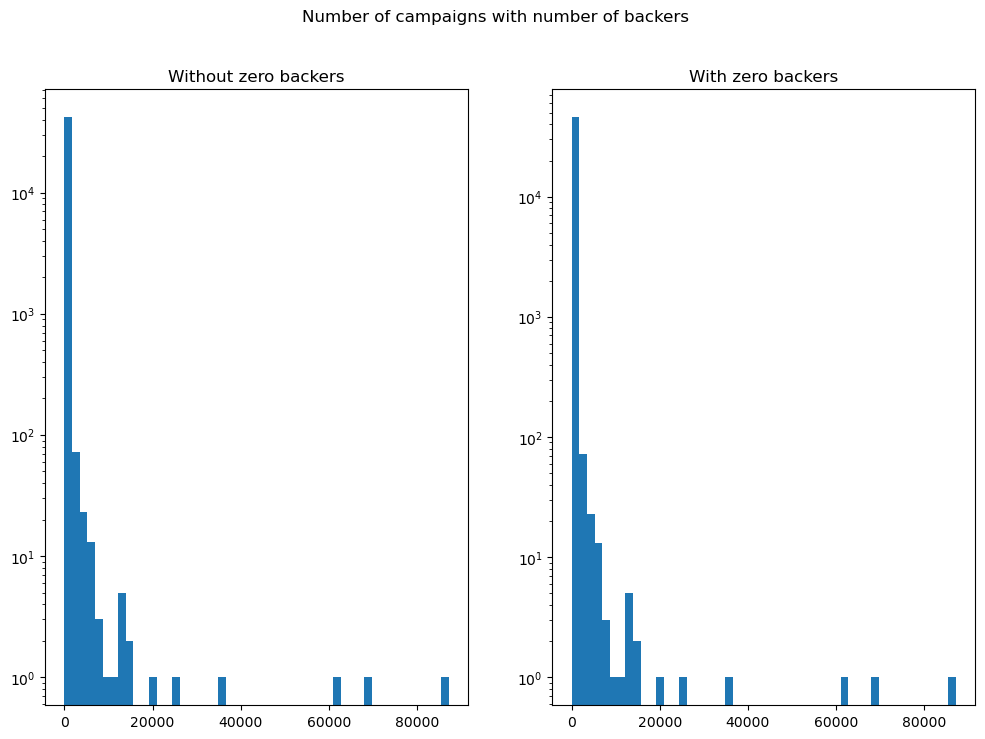

In [11]:
# what if we take out the projects with zero backers and put it side by side with the projects with zero backers, 
# is there a difference?

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
fig.suptitle('Number of campaigns with number of backers')

ax1.hist(
    x = without_zero_backers,
    bins = 50,
    log = True,
)
ax1.set_title('Without zero backers')

ax2.hist(
    x = 'backers',
    bins = 50,
    log = True,
    data = df,
)
ax2.set_title('With zero backers')

plt.show()

In [12]:
# calculating skewness

backers = df['backers']
skewness = (3 * (backers.mean() - backers.median())) / backers.std()
print(skewness)

# +ve skew of 0.2046

0.20463803244109835


In [13]:
# why are the skew values so weird... this method doesn't get the right answer i think..
from scipy.stats import skew

print(skew(df['backers']))
print(df['backers'].skew(skipna=False))

87.47111920387329
87.47397431084505


Text(6.194153917100694, 0.5, 'Number of campaigns')

<Figure size 1200x800 with 0 Axes>

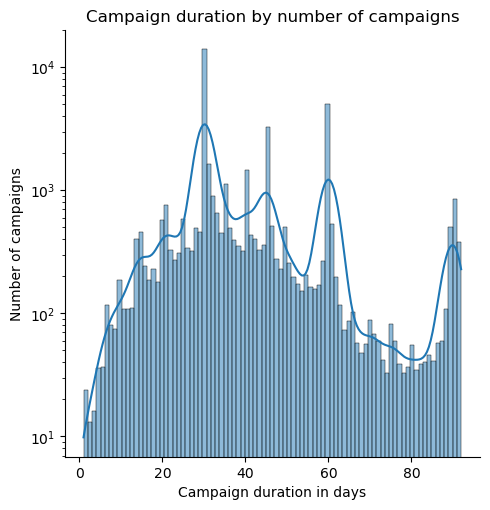

In [14]:
# can we see if duration is normally distributed? doesn't look like it..
plt.figure(figsize=(12,8))

sns.displot(
    data = df, 
    x = 'duration', 
    kind = 'hist', 
    kde = True,
    log_scale = (False, True),
)

plt.title('Campaign duration by number of campaigns')
plt.xlabel("Campaign duration in days")
plt.ylabel("Number of campaigns")

In [15]:
# 5 outcomes for kickstarter campaigns
df['status'].unique()

array(['successful', 'failed', 'live', 'canceled', 'suspended'],
      dtype=object)

In [16]:
# separate into 5 different variables... actually now not necessary
# successful = df[df['status'] == 'successful']
# failed = df[df['status'] == 'failed']
# live = df[df['status'] == 'live']
# canceled = df[df['status'] == 'canceled']
# suspended = df[df['status'] == 'suspended']

# len(successful) 22969 rows
# len(failed) 18996 rows
# len(live) 3929 rows
# len(canceled) 59 rows
# len(suspended) 4 rows

# let's exclude suspended since there's only 4 rows of data

x1 = df[df['status'] != 'suspended']
print(len(x1))
# on second thought let's also include canceled since there's only 59 rows of data

x2 = df[(df['status'] != 'suspended') & (df['status'] != 'canceled')]
print(len(x2))

# the live category is interesting... these are campaigns that are still ongoing
# let's take a look at how many live campaigns have met their funding goal

ks_live = x2[(df['pledged'] >= df['goal']) & (df['status'] == 'live')]
print(len(ks_live))

# 498 out of 3929.. not a lot but let's consider them equivalent to successful campaigns

ks_pass_or_fail = x2[(df['pledged'] >= df['goal']) | (df['status'] == 'failed')]
print(len(ks_pass_or_fail))

# we have 42463 pass or fail campaigns

print(len(ks_pass_or_fail[ks_pass_or_fail['status'] == 'failed']))

# 18996 failures

print(len(ks_pass_or_fail[ks_pass_or_fail['status'] == 'successful']))

# 22969 successes

45953
45894
498
42463
18996
22969


C:\Users\Wes\AppData\Local\Temp\ipykernel_31452\3842500856.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ks_live = x2[(df['pledged'] >= df['goal']) & (df['status'] == 'live')]
C:\Users\Wes\AppData\Local\Temp\ipykernel_31452\3842500856.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ks_pass_or_fail = x2[(df['pledged'] >= df['goal']) | (df['status'] == 'failed')]


In [17]:
# let's combine all live campaigns that have met the pledge with successful campaigns

print(len(ks_pass_or_fail[ks_pass_or_fail['status'] == 'successful']))

ks_pass_or_fail.status[ks_pass_or_fail['status'] == 'live'] = 'successful'

print(len(ks_pass_or_fail[ks_pass_or_fail['status'] == 'successful']))

ks_pass_or_fail['status'].unique()

# 23467 successes

22969
23467


C:\Users\Wes\AppData\Local\Temp\ipykernel_31452\2530084859.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ks_pass_or_fail.status[ks_pass_or_fail['status'] == 'live'] = 'successful'
C:\Users\Wes\AppData\Local\Temp\ipykernel_31452\2530084859.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ks_pass_or_fail.status[ks_pass_or_fail['status'] == 'live'] = 'successful'


array(['successful', 'failed'], dtype=object)

duration  status    
1.00      failed         1
          successful     4
1.01      successful     2
1.03      successful     1
1.49      failed         1
                        ..
91.00     successful    19
91.22     failed         1
91.48     failed         1
91.96     failed         9
          successful     4
Length: 8566, dtype: int64


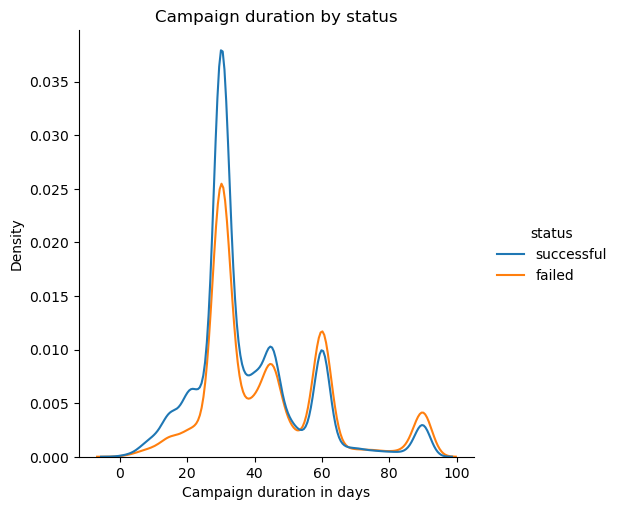

In [18]:
# with only successful or failed, plot campaign duration by status
sns.displot(
    data = ks_pass_or_fail,
    x = 'duration',
    kind = 'kde',
    hue = 'status',
)

plt.title('Campaign duration by status')
plt.xlabel("Campaign duration in days")
plt.ylabel("Density")

x7 = ks_pass_or_fail.groupby(['duration', 'status']).size()
print(x7)

In [19]:
# let's round the duration to nearest whole number

counts_duration = {}

for index, row in ks_pass_or_fail.iterrows():
    rounded = round(row['duration'])
    if row['status'] == 'successful':
        if rounded not in counts_duration:
            counts_duration[rounded] = {}
            counts_duration[rounded]['successful'] = 1
            counts_duration[rounded]['failed'] = 0
        else:
            counts_duration[rounded]['successful'] += 1
    elif row['status'] == 'failed':
        if rounded not in counts_duration:
            counts_duration[rounded] = {}
            counts_duration[rounded]['failed'] = 1
            counts_duration[rounded]['successful'] = 0
        else:
            counts_duration[rounded]['failed'] += 1
            
# print(counts_duration)
counts_duration_in_order = {}

for key, value in counts_duration.items():
    if key <40:
        if value['failed'] != 0:
            hold = value['successful'] / value['failed']
#             print(f" {key} : {hold}")
            counts_duration_in_order[key] = hold
    
# a bit hard to read the output



In [20]:
some_dict = {}

for key, value in counts_duration_in_order.items():
    if value > 2.4:
        some_dict[key] = value
        print(key, round(value, 3))
        
some_dict

# duration with largest ratio of successes to fails are 18, 19, 21, 23, 26, 28 and 1 day

21 2.658
26 2.632
18 2.6
28 2.614
19 3.571
23 2.588
1 3.5


{21: 2.6578947368421053,
 26: 2.632183908045977,
 18: 2.6,
 28: 2.6141732283464565,
 19: 3.5714285714285716,
 23: 2.588235294117647,
 1: 3.5}

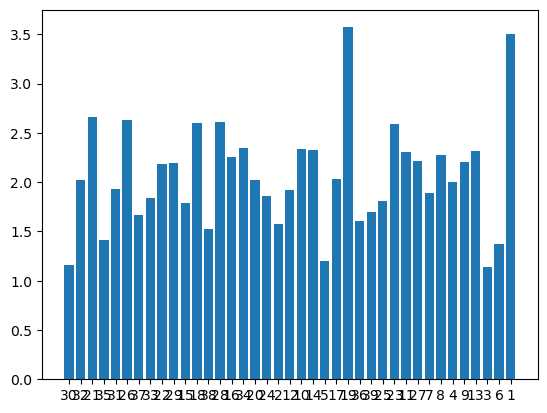

In [21]:
# a bit hard to read
names = list(counts_duration_in_order.keys())
values = list(counts_duration_in_order.values())

plt.bar(range(len(counts_duration_in_order)), values, tick_label=names)
plt.show()

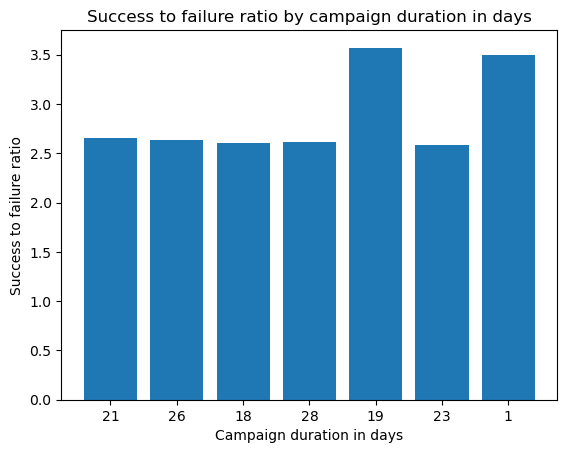

In [22]:
# let's look at the best durations

names = list(some_dict.keys())
values = list(some_dict.values())

plt.bar(range(len(some_dict)), values, tick_label=names)

plt.title('Success to failure ratio by campaign duration in days')
plt.xlabel("Campaign duration in days")
plt.ylabel("Success to failure ratio")

plt.show()

In [23]:
# how many projects with duration > 18.5 and < 19.5 days

print(374 / 23467)

ks_pass_or_fail[(ks_pass_or_fail['duration'] > 17.5) & (ks_pass_or_fail['duration'] < 19.5)]

0.015937273618272466


,project_id,name,url,category,subcategory,location,status,goal,pledged,funded_percentage,backers,funded_date,levels,reward_levels,updates,comments,duration
89,4326268,Free RPG Day Pathfinder Adventure from Gaming ...,http://www.kickstarter.com/projects/gamingpape...,Games,Board & Card Games,"Grand Rapids, MI",successful,1000.0,2665.0,2.664660,120,"Mon, 16 Apr 2012 01:00:00 -0000",5,"$6,$15,$28,$34,$95",7,19,18.10
171,8741161,C.J. Lassiter Plays a Showcase in Nashville,http://www.kickstarter.com/projects/cjlassiter...,Music,Electronic Music,"Nashville, TN",successful,470.0,651.0,1.385106,9,"Wed, 04 Apr 2012 23:00:00 -0000",9,"$1,$5,$10,$15,$25,$30,$50,$100,$200",3,2,18.93
206,10429602,Beaver Stomper! a retro video game project,http://www.kickstarter.com/projects/1997110766...,Games,Video Games,"Los Angeles, CA",failed,640.0,156.0,0.243750,4,"Sat, 05 May 2012 04:25:01 -0000",5,"$1,$4,$8,$24,$32",0,0,18.00
219,10817338,Arrah and the Ferns make a music video!,http://www.kickstarter.com/projects/1863692542...,Music,Indie Rock,"Philadelphia, PA",successful,2000.0,2110.0,1.055000,14,"Thu, 30 Dec 2010 23:00:00 -0000",9,"$1,$5,$10,$30,$50,$100,$150,$250,$500",0,0,17.92
284,13283392,Deceit,http://www.kickstarter.com/projects/deceit/deceit,Film & Video,Short Film,"Denton, TX",successful,1000.0,1843.0,1.843000,34,"Tue, 06 Mar 2012 06:53:32 -0000",7,"$1,$15,$30,$50,$100,$500,$1,000",11,1,18.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44855,2104562803,&quot;Don't Hang up On Me!&quot; Rocco Granite...,http://www.kickstarter.com/projects/2059382772...,Art,Performance Art,"Chicago, IL",successful,650.0,692.0,1.064615,38,"Fri, 05 Nov 2010 03:59:00 -0000",5,"$10,$20,$40,$60,$75",0,1,18.09
44892,2106106032,The Three Eyed Dragon,http://www.kickstarter.com/projects/kidkazooey...,Publishing,Children's Book,"Bloomington, IN",successful,1750.0,3671.0,2.097714,88,"Tue, 20 Mar 2012 21:17:00 -0000",4,"$10,$25,$50,$200",4,0,18.88
45106,2115847757,What's So Funny? Giving Comedians a Chance to ...,http://www.kickstarter.com/projects/1349115293...,Theater,Theater,"New York, NY",successful,300.0,310.0,1.033333,13,"Sun, 11 Sep 2011 03:59:00 -0000",5,"$5,$30,$75,$100,$250",8,0,19.11
45185,2118842631,"Angel Rocket Showcase in Austin, Texas",http://www.kickstarter.com/projects/1912577458...,Music,Rock,"Austin, TX",successful,1300.0,2266.0,1.743077,26,"Fri, 16 Mar 2012 04:00:00 -0000",10,"$1,$13,$17,$27,$33,$50,$100,$200,$300,$500",2,1,17.57


In [24]:
# what's up with that 1 day duration... let's take a look

df[df['duration'] <= 1]

# only 4 projects that succeed in 1 day

,project_id,name,url,category,subcategory,location,status,goal,pledged,funded_percentage,backers,funded_date,levels,reward_levels,updates,comments,duration
19805,931747986,CXL - Feature Film - The 24 Hour Kickstarter. ...,http://www.kickstarter.com/projects/sgillane/c...,Film &amp; Video,Narrative Film,"San Francisco, CA",successful,5000.0,5018.0,1.003610,70,"Thu, 07 Jul 2011 17:30:17 -0000",10,"$1,$5,$15,$25,$50,$100,$500,$1,000,$2,500,$5,000",8,2,1.0
25059,1175306310,Bj���_rk Swan Dress T-Shirt,http://www.kickstarter.com/projects/thereport/...,Art,Conceptual Art,"Brooklyn, NY",successful,180.0,472.0,2.622222,45,"Fri, 17 Feb 2012 17:00:00 -0000",6,"$1,$20,$20,$20,$20,$25",7,1,1.0
26099,1227406138,Foldable Shoes for Purse- that won't get it di...,http://www.kickstarter.com/projects/flipslip/f...,Fashion,Fashion,"San Francisco, CA",failed,200.0,0.0,0.000000,0,"Tue, 29 Nov 2011 10:35:18 -0000",2,"$1,$25",0,0,1.0
36775,1728704935,Help RonenV.com Get A New Camera!!,http://www.kickstarter.com/projects/ronen/help...,Photography,Photography,NaN,successful,500.0,500.0,1.000000,7,"Tue, 01 Dec 2009 23:05:00 -0000",2,"$20,$350",2,0,1.0
42212,1978168386,&quot;The New Years Resolution Tour&quot; Gas...,http://www.kickstarter.com/projects/sandlother...,Music,Music,"Bethlehem, PA",successful,200.0,201.0,1.005000,6,"Fri, 21 Jan 2011 04:10:43 -0000",1,$25,0,0,1.0


Text(20.82831944444444, 0.5, 'Density')

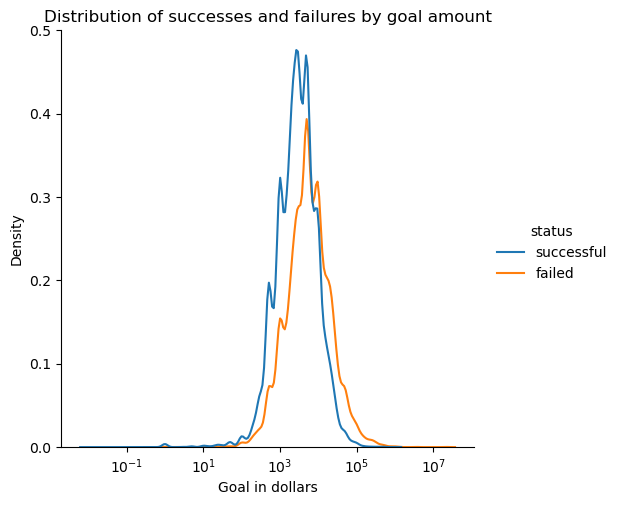

In [25]:
# what is the ideal pledge amount?

sns.displot(
    data = ks_pass_or_fail,
    x = 'goal',
    kind = 'kde',
#     kde = True,
    hue = 'status',
    log_scale = (True, False),
)

plt.title('Distribution of successes and failures by goal amount')
plt.xlabel('Goal in dollars')
plt.ylabel('Density')

# we can see that failure rate increases after a certain goal amount
# but this graph is hard to read.. let's restrict the goal amount

Text(-14.67168055555556, 0.5, 'Density')

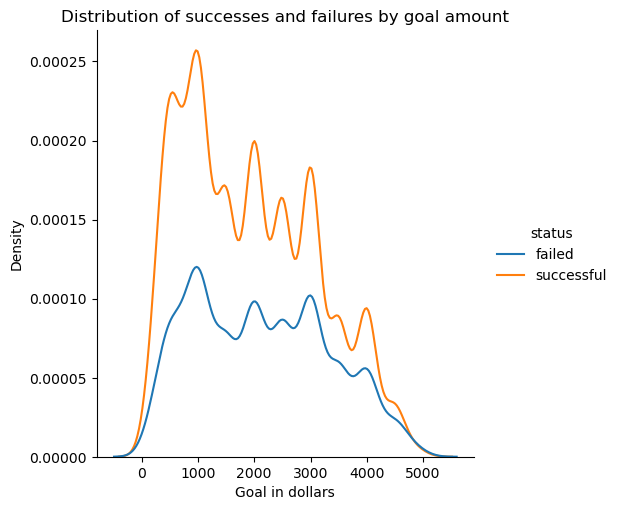

In [26]:
# adjusting the upper and lower limits of the goal amounts to the range where successes are more than failures

goal_adjusted = ks_pass_or_fail[(ks_pass_or_fail['goal'] < 5000) & (ks_pass_or_fail['goal'] > 10 ** 2)]

sns.displot(
    data = goal_adjusted,
    x = 'goal',
    kind = 'kde',
#     kde = True,
    hue = 'status',
#     log_scale = (True, False),
)

plt.title('Distribution of successes and failures by goal amount')
plt.xlabel('Goal in dollars')
plt.ylabel('Density')


# we can see that projects with very low funding tend to be successful, 5000 or less

In [27]:
# but how many projects ask for so little and actually succeed?

print(len(ks_pass_or_fail[(ks_pass_or_fail['goal'] <= 1000) & (ks_pass_or_fail['status'] == 'successful')]))

len(ks_pass_or_fail[(ks_pass_or_fail['goal'] <= 1000) & (ks_pass_or_fail['status'] == 'successful')]) / len(ks_pass_or_fail[ks_pass_or_fail['status'] == 'successful'])

5234


0.22303660459368474

<Axes: xlabel='status', ylabel='goal'>

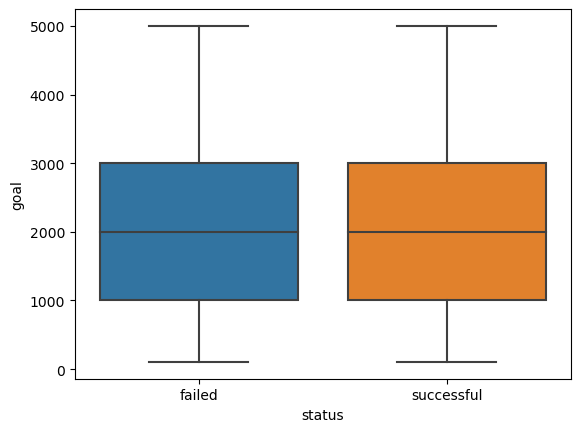

In [28]:
# a boxplox.. does it help?

sns.boxplot(data = goal_adjusted, x = 'status', y = 'goal',)

Text(0, 0.5, 'Number of campaigns')

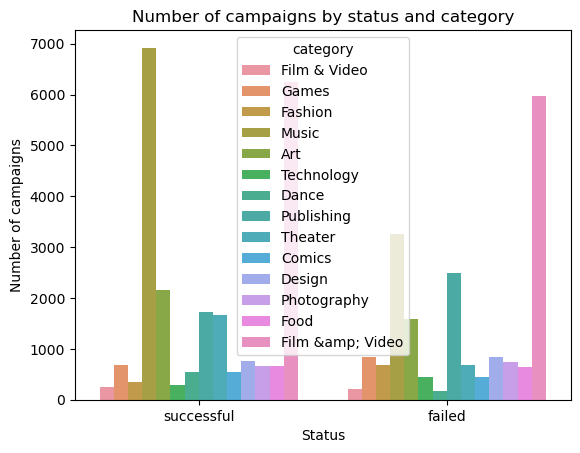

In [29]:
# by status of campaigns which are the categories most likely to succeed or fail?
sns.countplot(data = ks_pass_or_fail, x = 'status', hue = 'category')

plt.title('Number of campaigns by status and category')
plt.xlabel('Status')
plt.ylabel('Number of campaigns')
# plt.legend(loc = 'upper right')

# a bit hard to read the categories.. let's try something else

category          status    
Art               failed        1585
                  successful    2150
Comics            failed         448
                  successful     542
Dance             failed         180
                  successful     536
Design            failed         837
                  successful     768
Fashion           failed         684
                  successful     346
Film & Video      failed         210
                  successful     253
Film &amp; Video  failed        5962
                  successful    6253
Food              failed         643
                  successful     664
Games             failed         832
                  successful     684
Music             failed        3261
                  successful    6920
Photography       failed         742
                  successful     665
Publishing        failed        2484
                  successful    1723
Technology        failed         448
                  successful     298
Theater  

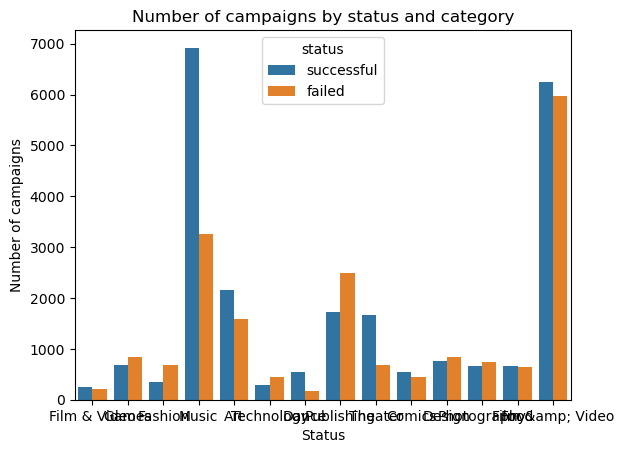

In [30]:
# problem with the formatting of the x-labels, refer to above to see which category is which

sns.countplot(data = ks_pass_or_fail, x = 'category', hue = 'status')

plt.title('Number of campaigns by status and category')
plt.xlabel('Status')
plt.ylabel('Number of campaigns')

x6 = ks_pass_or_fail.groupby(['category', 'status']).size()
print(x6)

In [31]:
# film & amp video has more successes than failures but only by a small amount
# most successful is music and theatre but lets take a deeper look

counts_category = {}

for index, row in ks_pass_or_fail.iterrows():
    if row['status'] == 'successful':
        if row['category'] not in counts_category:
            counts_category[row['category']] = {}
            counts_category[row['category']]['successful'] = 1
            counts_category[row['category']]['failed'] = 0
        else:
            counts_category[row['category']]['successful'] += 1
    elif row['status'] == 'failed':
        if row['category'] not in counts_category:
            counts_category[row['category']] = {}
            counts_category[row['category']]['failed'] = 1
            counts_category[row['category']]['successful'] = 0
        else:
            counts_category[row['category']]['failed'] += 1
            
print(counts_category)

for key, value in counts_category.items():
    hold5 = value['successful'] / value['failed']
    hold_5_key = key
    print(f" {hold_5_key} : {hold5}")
    
# worst category is fashion followed by technology, most successful is dance followed by theatre then music

{'Film & Video': {'successful': 253, 'failed': 210}, 'Games': {'failed': 832, 'successful': 684}, 'Fashion': {'failed': 684, 'successful': 346}, 'Music': {'successful': 6920, 'failed': 3261}, 'Art': {'successful': 2150, 'failed': 1585}, 'Technology': {'successful': 298, 'failed': 448}, 'Dance': {'failed': 180, 'successful': 536}, 'Publishing': {'failed': 2484, 'successful': 1723}, 'Theater': {'failed': 680, 'successful': 1665}, 'Comics': {'failed': 448, 'successful': 542}, 'Design': {'failed': 837, 'successful': 768}, 'Photography': {'failed': 742, 'successful': 665}, 'Food': {'failed': 643, 'successful': 664}, 'Film &amp; Video': {'failed': 5962, 'successful': 6253}}
 Film & Video : 1.2047619047619047
 Games : 0.8221153846153846
 Fashion : 0.5058479532163743
 Music : 2.1220484513952775
 Art : 1.3564668769716088
 Technology : 0.6651785714285714
 Dance : 2.977777777777778
 Publishing : 0.6936392914653784
 Theater : 2.448529411764706
 Comics : 1.2098214285714286
 Design : 0.9175627240143

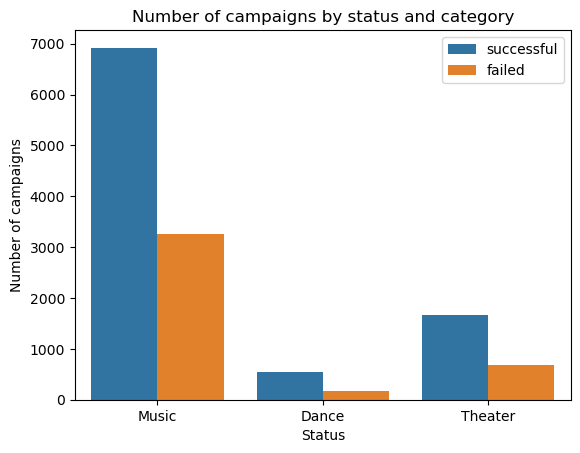

In [32]:
ks_pass_or_fail_useful = ks_pass_or_fail[(ks_pass_or_fail['category'] == 'Theater') | (ks_pass_or_fail['category'] == 'Dance') | (ks_pass_or_fail['category'] == 'Music')]


sns.countplot(data = ks_pass_or_fail_useful, x = 'category', hue = 'status')

plt.title('Number of campaigns by status and category')
plt.xlabel('Status')
plt.ylabel('Number of campaigns')
plt.legend(loc = 'upper right')


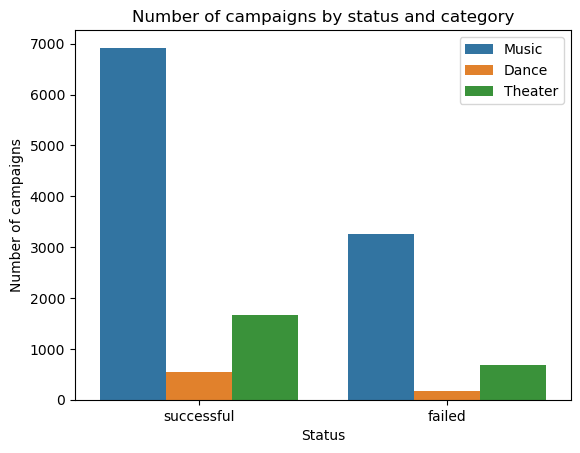

In [33]:
sns.countplot(data = ks_pass_or_fail_useful, x = 'status', hue = 'category')
plt.title('Number of campaigns by status and category')
plt.xlabel('Status')
plt.ylabel('Number of campaigns')
plt.legend(loc = 'upper right')

In [34]:
# extracting out the day, month and time variables and putting them into new columns

ks_pass_or_fail['day'] = ks_pass_or_fail.funded_date.str.split(',', expand = True)[0]
ks_pass_or_fail['month'] = ks_pass_or_fail.funded_date.str.split(',', expand = True)[1].str.split(expand = True)[1]
ks_pass_or_fail['time'] = ks_pass_or_fail.funded_date.str.split(',', expand = True)[1].str.split(expand = True)[3]
ks_pass_or_fail['time_hour'] = ks_pass_or_fail.time.str.split(':', expand = True)[0] #capture just the hour data
ks_pass_or_fail.head()

C:\Users\Wes\AppData\Local\Temp\ipykernel_31452\973565799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ks_pass_or_fail['day'] = ks_pass_or_fail.funded_date.str.split(',', expand = True)[0]
C:\Users\Wes\AppData\Local\Temp\ipykernel_31452\973565799.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ks_pass_or_fail['month'] = ks_pass_or_fail.funded_date.str.split(',', expand = True)[1].str.split(expand = True)[1]
C:\Users\Wes\AppData\Local\Temp\ipykernel_31452\973565799.py:5: SettingWithCopyWarning: 
A

,project_id,name,url,category,subcategory,location,status,goal,pledged,funded_percentage,...,funded_date,levels,reward_levels,updates,comments,duration,day,month,time,time_hour
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,...,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,Fri,Aug,19:28:17,19
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,...,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18,Mon,Aug,03:59:00,03
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,...,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22,Sun,Apr,02:14:00,02
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,...,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00,Wed,Jun,15:25:39,15
5,316217,Dinner Party - a short film about friendship.....,http://www.kickstarter.com/projects/249354515/...,Film & Video,Short Film,"Portland, OR",successful,3500.0,3582.0,1.023331,...,"Wed, 22 Jun 2011 13:33:00 -0000",7,"$5,$25,$50,$100,$250,$500,$1,000",8,0,21.43,Wed,Jun,13:33:00,13


day  status    
Fri  failed        2913
     successful    3479
Mon  failed        2714
     successful    3505
Sat  failed        3043
     successful    3765
Sun  failed        2854
     successful    3514
Thu  failed        2650
     successful    3377
Tue  failed        2397
     successful    2816
Wed  failed        2425
     successful    3011
dtype: int64


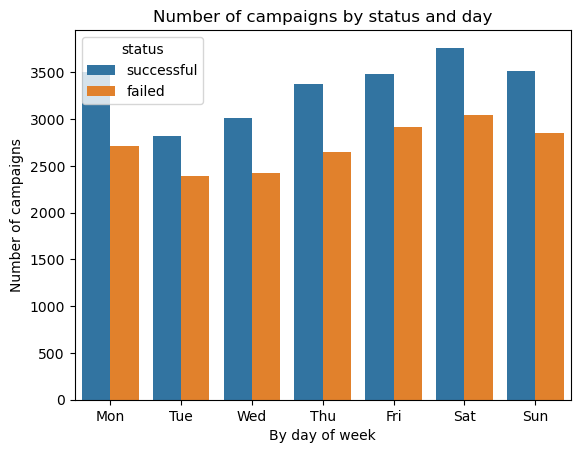

In [35]:
# countplot of status by day of week

day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

sns.countplot(data = ks_pass_or_fail, x = 'day', hue = 'status', order = day_names)

plt.title('Number of campaigns by status and day')
plt.xlabel('By day of week')
plt.ylabel('Number of campaigns')


x3 = ks_pass_or_fail.groupby(['day', 'status']).size()
print(x3)

In [36]:
# best day looks to be monday but can we confirm this

counts_day = {}

for index, row in ks_pass_or_fail.iterrows():
    if row['status'] == 'successful':
        if row['day'] not in counts_day:
            counts_day[row['day']] = {}
            counts_day[row['day']]['successful'] = 1
            counts_day[row['day']]['failed'] = 0
        else:
            counts_day[row['day']]['successful'] += 1
    elif row['status'] == 'failed':
        if row['day'] not in counts_day:
            counts_day[row['day']] = {}
            counts_day[row['day']]['failed'] = 1
            counts_day[row['day']]['successful'] = 0
        else:
            counts_day[row['day']]['failed'] += 1
            
print(counts_day)

for key, value in counts_day.items():
    hold3 = value['successful'] / value['failed']
    print(f" {key} : {hold3}")
    
# the best day is mon, followed by thu and then wed, followed by the weekends

{'Fri': {'successful': 3479, 'failed': 2913}, 'Mon': {'failed': 2714, 'successful': 3505}, 'Sun': {'successful': 3514, 'failed': 2854}, 'Wed': {'failed': 2425, 'successful': 3011}, 'Sat': {'failed': 3043, 'successful': 3765}, 'Tue': {'successful': 2816, 'failed': 2397}, 'Thu': {'successful': 3377, 'failed': 2650}}
 Fri : 1.1943014074836937
 Mon : 1.291451731761238
 Sun : 1.2312543798177995
 Wed : 1.2416494845360824
 Sat : 1.2372658560630956
 Tue : 1.1748018356278682
 Thu : 1.2743396226415094


month  status    
Apr    failed        2197
       successful    2929
Aug    failed        1378
       successful    1666
Dec    failed        1574
       successful    1725
Feb    failed        1469
       successful    1764
Jan    failed        1446
       successful    1659
Jul    failed        1336
       successful    1536
Jun    failed        1312
       successful    2009
Mar    failed        1967
       successful    2592
May    failed        2664
       successful    3044
Nov    failed        1123
       successful    1517
Oct    failed        1271
       successful    1530
Sep    failed        1259
       successful    1496
dtype: int64


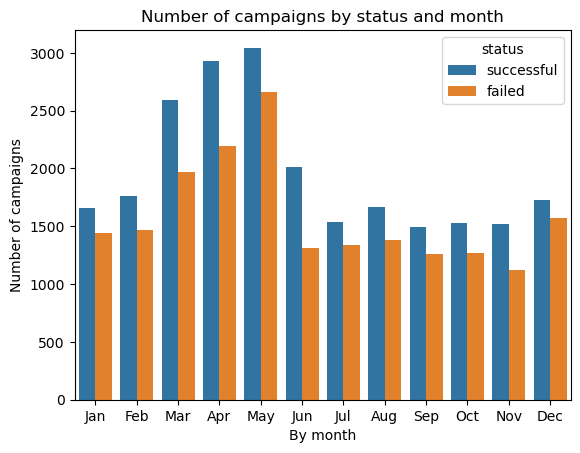

In [37]:
# countplot of status by month

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

sns.countplot(data = ks_pass_or_fail, x = 'month', hue = 'status', order = month_names)

plt.title('Number of campaigns by status and month')
plt.xlabel('By month')
plt.ylabel('Number of campaigns')


x4 = ks_pass_or_fail.groupby(['month', 'status']).size()
print(x4)

In [38]:
# successes outnumber failures.. with the months of Mar, Apr and May having the
# most successes, but what about proportion of successes to failures? visually 
# this looks to be june but let's take a look

counts_month = {}

for index, row in ks_pass_or_fail.iterrows():
    if row['status'] == 'successful':
        if row['month'] not in counts_month:
            counts_month[row['month']] = {}
            counts_month[row['month']]['successful'] = 1
            counts_month[row['month']]['failed'] = 0
        else:
            counts_month[row['month']]['successful'] += 1
    elif row['status'] == 'failed':
        if row['month'] not in counts_month:
            counts_month[row['month']] = {}
            counts_month[row['month']]['failed'] = 1
            counts_month[row['month']]['successful'] = 0
        else:
            counts_month[row['month']]['failed'] += 1
            
print(counts_month)

for key, value in counts_month.items():
    hold1 = value['successful'] / value['failed']
    print(f" {key} : {hold1}")
    
# june has highest proportion of success to failure at 1.53

{'Aug': {'successful': 1666, 'failed': 1378}, 'Apr': {'successful': 2929, 'failed': 2197}, 'Jun': {'failed': 1312, 'successful': 2009}, 'Feb': {'failed': 1469, 'successful': 1764}, 'Dec': {'successful': 1725, 'failed': 1574}, 'Nov': {'successful': 1517, 'failed': 1123}, 'Jul': {'successful': 1536, 'failed': 1336}, 'Mar': {'failed': 1967, 'successful': 2592}, 'Oct': {'failed': 1271, 'successful': 1530}, 'Jan': {'successful': 1659, 'failed': 1446}, 'Sep': {'failed': 1259, 'successful': 1496}, 'May': {'failed': 2664, 'successful': 3044}}
 Aug : 1.20899854862119
 Apr : 1.33318161128812
 Jun : 1.53125
 Feb : 1.2008168822328114
 Dec : 1.0959339263024142
 Nov : 1.350845948352627
 Jul : 1.1497005988023952
 Mar : 1.3177427554651755
 Oct : 1.2037765538945713
 Jan : 1.1473029045643153
 Sep : 1.188244638602065
 May : 1.1426426426426426


['19', '03', '02', '15', '13', ..., '11', '12', '08', '10', '09']
Length: 24
Categories (24, object): ['00', '01', '02', '03', ..., '20', '21', '22', '23']


C:\Users\Wes\AppData\Local\Temp\ipykernel_31452\3854307175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ks_pass_or_fail['time_hour'] = pd.Categorical(ks_pass_or_fail.time_hour)


time_hour  status    
00         failed         964
           successful    1173
01         failed        1029
           successful    1094
02         failed         919
           successful    1071
03         failed        1519
           successful    2576
04         failed        1368
           successful    2231
05         failed         869
           successful    1129
06         failed         700
           successful    1018
07         failed         507
           successful     702
08         failed         256
           successful     282
09         failed         186
           successful     185
10         failed         181
           successful     144
11         failed         194
           successful     176
12         failed         275
           successful     287
13         failed         434
           successful     478
14         failed         570
           successful     676
15         failed         667
           successful     885
16         failed 

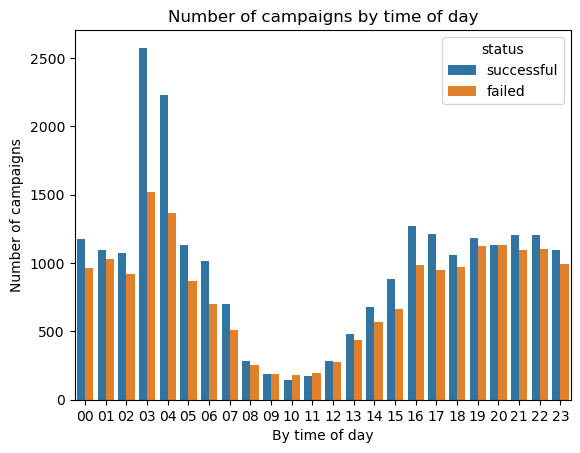

In [39]:
# countplot of status by time of day

ks_pass_or_fail['time_hour'] = pd.Categorical(ks_pass_or_fail.time_hour)
print(ks_pass_or_fail['time_hour'].unique())

sns.countplot(data = ks_pass_or_fail, x = 'time_hour', hue = 'status', )

plt.title('Number of campaigns by time of day')
plt.xlabel('By time of day')
plt.ylabel('Number of campaigns')


x5 = ks_pass_or_fail.groupby(['time_hour', 'status']).size()
print(x5)

In [40]:
# certainly the most popular times seem to be at night? let's verify this again

counts_hour = {}

for index, row in ks_pass_or_fail.iterrows():
    if row['status'] == 'successful':
        if row['time_hour'] not in counts_hour:
            counts_hour[row['time_hour']] = {}
            counts_hour[row['time_hour']]['successful'] = 1
            counts_hour[row['time_hour']]['failed'] = 0
        else:
            counts_hour[row['time_hour']]['successful'] += 1
    elif row['status'] == 'failed':
        if row['time_hour'] not in counts_hour:
            counts_hour[row['time_hour']] = {}
            counts_hour[row['time_hour']]['failed'] = 1
            counts_hour[row['time_hour']]['successful'] = 0
        else:
            counts_hour[row['time_hour']]['failed'] += 1
            
print(counts_hour)

for key, value in counts_hour.items():
    hold2 = value['successful'] / value['failed']
    print(f" {key} : {hold2}")
    
# the hours of 03 and 04 give the highest ratio of successes to failures
# with hours of 09, 10 and 11 being the worst... with failures outnumbering successes

{'19': {'successful': 1180, 'failed': 1127}, '03': {'failed': 1519, 'successful': 2576}, '02': {'successful': 1071, 'failed': 919}, '15': {'failed': 667, 'successful': 885}, '13': {'successful': 478, 'failed': 434}, '04': {'successful': 2231, 'failed': 1368}, '06': {'successful': 1018, 'failed': 700}, '20': {'successful': 1134, 'failed': 1129}, '22': {'successful': 1209, 'failed': 1102}, '23': {'failed': 996, 'successful': 1093}, '00': {'failed': 964, 'successful': 1173}, '18': {'successful': 1057, 'failed': 969}, '05': {'failed': 869, 'successful': 1129}, '21': {'successful': 1205, 'failed': 1094}, '16': {'failed': 989, 'successful': 1269}, '01': {'failed': 1029, 'successful': 1094}, '07': {'failed': 507, 'successful': 702}, '17': {'successful': 1213, 'failed': 952}, '14': {'successful': 676, 'failed': 570}, '11': {'failed': 194, 'successful': 176}, '12': {'failed': 275, 'successful': 287}, '08': {'failed': 256, 'successful': 282}, '10': {'failed': 181, 'successful': 144}, '09': {'fai